# Import Modules

In [1]:
import os
print(os.getcwd())
import sys

import pandas as pd

from pymatgen.io.ase import AseAtomsAdaptor

# #########################################################
from methods import get_df_dft

# #########################################################
from local_methods import XRDCalculator
from local_methods import get_top_xrd_facets

/home/raulf2012/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_OER/workflow/xrd_bulks


# Script Inputs

In [2]:
verbose = True
verbose = False

# Read Data

In [3]:
df_dft = get_df_dft()
print("df_dft.shape:", df_dft.shape[0])

from methods import get_df_xrd
df_xrd = get_df_xrd()

df_dft.shape: 565


In [4]:
df_xrd = df_xrd.set_index("id_unique", drop=False)

In [5]:
# assert False

In [6]:
# df_dft[df_dft.stoich == "AB3"]

In [7]:
# df_dft.loc["8ymh8qnl6o"]

In [16]:
# bulk_id_i = "8ymh8qnl6o"
# bulk_id_i = "8p8evt9pcg"
bulk_id_i = "8l919k6s7p"

row_i = df_dft.loc[bulk_id_i]

atoms_i = row_i.atoms

# Writing bulk facets
atoms_i.write("__temp__/bulk.traj")
atoms_i.write("__temp__/bulk.cif")

In [9]:
row_xrd_i = df_xrd.loc[bulk_id_i]

top_facets_i = row_xrd_i.top_facets

In [10]:
top_facets_i

[(1, 0, 0), (1, 1, 1), (1, 0, 1), (0, 0, 1), (1, 1, 0)]

In [11]:
atoms = atoms_i

AAA = AseAtomsAdaptor()
struct_i = AAA.get_structure(atoms)

XRDCalc = XRDCalculator(
    wavelength='CuKa',
    symprec=0,
    debye_waller_factors=None,
    )

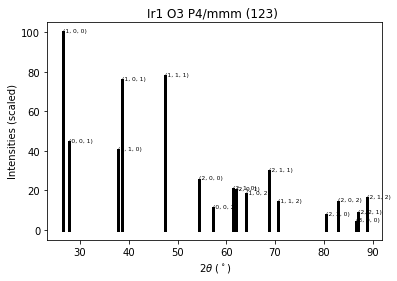

In [12]:
# XRDCalc.get_plot(structure=struct_i)
# XRDCalc.get_plot?

tmp = XRDCalc.plot_structures([struct_i])

In [13]:
# tmp.savefig("out_plot/tmp.png")

tmp.savefig(
    "out_plot/tmp_0.png",
    dpi=1600,
    )

In [37]:
# from methods import get_df_slab

# df_slab = get_df_slab()

# df_slab_i = df_slab[df_slab.bulk_id == bulk_id_i]

# for slab_id_i, row_i in df_slab_i.iterrows():

#     # #########################################################
#     slab_final_i =  row_i.slab_final
#     slab_id_i = row_i.slab_id
#     facet_i = row_i.facet
#     # #########################################################

#     file_name_i = slab_id_i + "_" + facet_i + ".cif"

#     slab_final_i.write(os.path.join("__temp__/slabs", file_name_i))

In [36]:
# df_slab_i.shape